In [1]:
# load libraries
from PIL import Image, ImageOps
import sys, os

# load image_generator from fairseq/data/visual/image_generator.py
visdir = os.path.join(os.getcwd(),'fairseq/data/visual/')
sys.path.append(visdir)
from image_generator import TextImageGenerator

# Background

A single ttf font cannot cover all characters in all scripts. Pangocairo allows us to specify fallback fonts so that collectively all characters that can be typeset can be rendered. Fallback fonts at the character level also allows for code-mixing across scripts.  
This repository contains a directory with fallback fonts (the Noto font family + emoji coverage) so that if a glyph is not covered in the default NotoSans-Regular font file (which covers mostly Latin scripts) the renderer can back off to the appropriate font.  
Without this set up correctly, other languages would be represented with a box in place of an appropriate rendered form.

Our models were trained with the full Noto family as fallback fonts; without fallback fonts configured, poor performance will result for most languages due to incorrectly rendered output, as illustrated below.

Below we will walk through a few steps to verify that your configuration is successful and illustrate important parameters, and visualize model inputs.

If you're on a mac, please first see [the wiki on configuring fonts for MacOS](https://github.com/esalesky/visrep/wiki/) before proceeding.

## Specifying fontconfig backend and conf file

This is done when running fairseq in `image_generator.py`  
Note that you should use an absolute path to the fontconfig file, or it may show a warning and not correctly whitelist/blacklist fonts.

In [2]:
os.environ["PANGOCAIRO_BACKEND"] = "fontconfig"
os.environ["FONTCONFIG_FILE"] = f'{visdir}/abc.conf'

# Examples of bad behavior without fallback fonts

## Loading the renderer without fallback fonts
Without fallback fonts, we add only the specified font (Noto Sans) to the 4 system defaults

In [3]:
# -- loading the default image generator with fallback fonts=None -- 
image_generator = TextImageGenerator(
    fallback_fonts_dir=None, 
    font_file=f'{visdir}/fonts/NotoSans-Regular.ttf',
)

In [4]:
image_generator.fonts_list

['Monospace', 'Noto Sans', 'Sans', 'Serif', 'System-ui']

## Examples of bad behavior

In the next examples, the Devanagari and Arabic script characters are not covered by the specified font_file.  
Without fallback fonts enabled, a warning about unknown glyphs will be shown, and boxes with letters and numbers will appear instead of the expected output. 

In [5]:
sentence = "test जब मैं 11 साल का था मैं एक सुबह उठी खुशी की आवाज"
sent_image = image_generator.get_image(sentence)
image = Image.fromarray(sent_image)
display(image)

Found 34 unknown glyphs in sentence: test जब मैं 11 साल का था मैं एक सुबह उठी खुशी की आवाज. Consider double-checking that the correct fonts are loaded.


In [6]:
sentence = 'أَفَاسْتَسْقَيْنَاكُمُوهَا test test أَفَاسْتَسْقَيْ'
sent_image = image_generator.get_image(sentence)
image = Image.fromarray(sent_image)
display(image)

Found 41 unknown glyphs in sentence: أَفَاسْتَسْقَيْنَاكُمُوهَا test test أَفَاسْتَسْقَيْ. Consider double-checking that the correct fonts are loaded.


Similarly, in the next example, emojis are not covered by the specified font_file and so appear as unknown glyphs.

In [7]:
sentence = "My cat 🐈 loves pancakes 🥞 and my duck 🦆 loves grapes 🍇"
sent_image = image_generator.get_image(sentence)
image = Image.fromarray(sent_image)
display(image)

Found 4 unknown glyphs in sentence: My cat 🐈 loves pancakes 🥞 and my duck 🦆 loves grapes 🍇. Consider double-checking that the correct fonts are loaded.


# Examples of correct behavior with fallback fonts

## Load renderer with fallback fonts

Note that fontconfig expects an absolute path to the directory with the fallback fonts files. 

In [ ]:
# restart kernel; necessary to clear pango cache if changing the fonts available to the renderer, which 
#  normally we would never do, but do in this notebook for illustrative purposes
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [1]:
# reload libraries
from PIL import Image, ImageOps; import sys, os; visdir = os.path.join(os.getcwd(),'fairseq/data/visual/'); sys.path.append(visdir); from image_generator import TextImageGenerator; os.environ["PANGOCAIRO_BACKEND"] = "fontconfig"; os.environ["FONTCONFIG_FILE"] = f'{visdir}/abc.conf'

In [2]:
# -- loading default image generator, with fallback fonts -- 
image_generator = TextImageGenerator(
    fallback_fonts_dir=os.path.join(visdir, 'fonts/fallback_fonts'),
    font_file=os.path.join(visdir, 'fonts/NotoSans-Regular.ttf'),
)

In [3]:
image_generator.fonts_list

['Monospace',
 'Noto Color Emoji',
 'Noto Fangsong KSS Rotated',
 'Noto Fangsong KSS Vertical',
 'Noto Music',
 'Noto Rashi Hebrew',
 'Noto Sans',
 'Noto Sans Adlam',
 'Noto Sans Adlam Unjoined',
 'Noto Sans Anatolian Hieroglyphs',
 'Noto Sans Arabic',
 'Noto Sans Armenian',
 'Noto Sans Avestan',
 'Noto Sans Balinese',
 'Noto Sans Bamum',
 'Noto Sans Bassa Vah',
 'Noto Sans Batak',
 'Noto Sans Bengali',
 'Noto Sans Bengali UI',
 'Noto Sans Bhaiksuki',
 'Noto Sans Brahmi',
 'Noto Sans Buginese',
 'Noto Sans Buhid',
 'Noto Sans CJK HK',
 'Noto Sans CJK JP',
 'Noto Sans CJK KR',
 'Noto Sans CJK SC',
 'Noto Sans CJK TC',
 'Noto Sans Canadian Aboriginal',
 'Noto Sans Carian',
 'Noto Sans Caucasian Albanian',
 'Noto Sans Chakma',
 'Noto Sans Cham',
 'Noto Sans Cherokee',
 'Noto Sans Chorasmian',
 'Noto Sans Coptic',
 'Noto Sans Cuneiform',
 'Noto Sans Cypriot',
 'Noto Sans Cypro Minoan',
 'Noto Sans Deseret',
 'Noto Sans Devanagari',
 'Noto Sans Devanagari UI',
 'Noto Sans Duployan',
 'Noto 

## Examples of correct behavior

In [4]:
sentence = "this is an example requiring no fallback fonts"
sent_image = image_generator.get_image(sentence)
image = Image.fromarray(sent_image)
display(image)

In [5]:
sentence = "test जब मैं 11 साल का था मैं एक सुबह उठी खुशी की आवाज"
sent_image = image_generator.get_image(sentence)
image = Image.fromarray(sent_image)
display(image)

In [6]:
sentence = 'أَفَاسْتَسْقَيْنَاكُمُوهَا test test أَفَاسْتَسْقَيْ'
sent_image = image_generator.get_image(sentence)
image = Image.fromarray(sent_image)
display(image)

In [7]:
sentence = "My cat 🐈 loves pancakes 🥞 and my duck 🦆 loves grapes 🍇"
sent_image = image_generator.get_image(sentence)
image = Image.fromarray(sent_image)
display(image)

# Success! 🏆

And that's it! If when you run the four cells above, your output looks as shown below, you are good to go! 

![correctly-rendered-examples](fairseq/data/visual/fonts/correctly-rendered-examples.png)

---

# Additional illustrative renderer examples

Here we first show some additional examples illustrating some properties of the image renderer.  
Lastly, down below we show how to view the tokenized (patch) images which are the input to our models. 

Note that the renderer by default is set up to strip sentencepiece formatting (and *only* sentencepiece formatting).  
To change this, set `debpe = False` in `image_generator.py` in the function `_render_single_sentence`.

In [8]:
sentence = "▁test ▁t est"
sent_image = image_generator.get_image(sentence)
image = Image.fromarray(sent_image)
display(image)

Sentence-level images are shape (height, length). By default, `rgb` is set to `False`, and a single color channel is used.  
If `rgb` is set to `True`, there will be 3 channels instead of 1, and the returned shape will be (height, length, channels). 

In [9]:
sent_image.shape

(24, 72)

In [10]:
image_generator.rgb=True

In [11]:
sentence = "My cat 🐈 loves pancakes 🥞 and my duck 🦆 loves grapes 🍇"
sent_image = image_generator.get_image(sentence)
image = Image.fromarray(sent_image)
display(image)

In [12]:
sent_image.shape

(24, 480, 3)

Changes to some properties can be made without reloading the font or restarting the kernel;  
Font configurations require calling `load_font()` to update, while changing the available fonts requires clearing the pango cache via a new process.

In [13]:
image_generator.font_size=6
image_generator.load_font()

In [14]:
sentence = "My cat 🐈 loves pancakes 🥞 and my duck 🦆 loves grapes 🍇"
sent_image = image_generator.get_image(sentence)
image = Image.fromarray(sent_image)
display(image)

# Tokenizing sentence-level images into patches

When creating a TextImageGenerator object, the `pixels_per_patch` parameter controls the height and width of each pixel patch when tokenizing (we use square patches). 
The `stride` parameter dictates the number of pixels to the start of the next patch when tokenizing the image into fixed-size patches. 
By default, these are set to 24 and 12. If `stride=pixels_per_patch`, there will be no overlap between patches.

The function `get_images` tokenizes the image into patches. This function is used for demonstration only; when training, we do not tokenize images but rather slice the image tensor directly for more efficient processing.  
The function `show_images` below allows us to view the individual patches resulting from tokenizing the sentence-level image.  

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union,List

def show_images(images: List[np.ndarray]) -> None:
    n: int = len(images)
    f = plt.figure(figsize=(20, 5))
    for i in range(n):
        # subplot per token
        ax = f.add_subplot(1, n, i + 1)
        plt.imshow(images[i],cmap='gray', vmin=0, vmax=255)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show(block=True)

image_generator.font_size=10
image_generator.load_font()    

The number of characters per patch will vary slightly by script, in addition to font, font size, dpi, etc. 

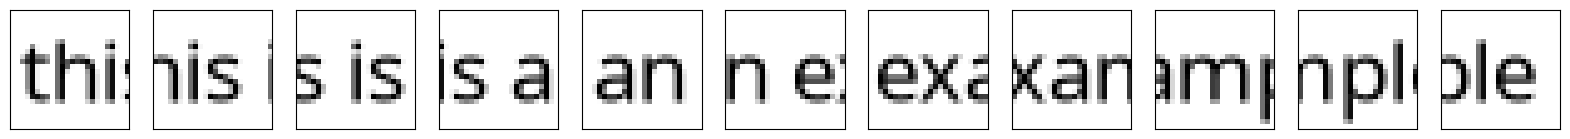

In [16]:
sentence = 'this is an example'
x, image_tokens = image_generator.get_images(sentence)
show_images(image_tokens)

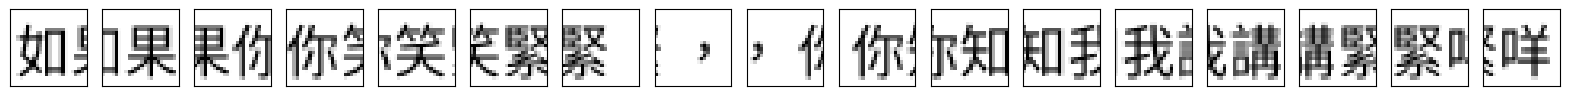

In [17]:
sentence = '如果你笑緊 ， 你知我講緊咩'
x, image_tokens = image_generator.get_images(sentence)
show_images(image_tokens)

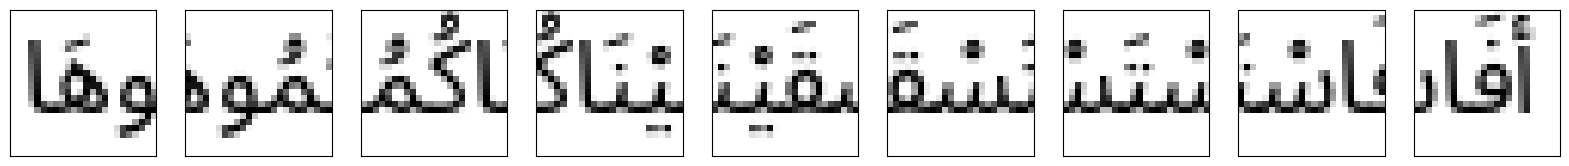

In [18]:
sentence = 'أَفَاسْتَسْقَيْنَاكُمُوهَا'
x, image_tokens = image_generator.get_images(sentence)
show_images(image_tokens)